In [28]:
def readDataFromFile(filename):
    from numpy import genfromtxt
    print "reading data please wait..."
    my_data = genfromtxt(filename, delimiter=',',skip_header=1)
    print my_data.shape
    return my_data

In [36]:
def readDataFromFile2(filename):
    import csv
    ret = []
    with open(filename, 'rb') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            ret.append(row)
        return ret

In [361]:
def plotDataIn2D(x_data, y_data):
    %pylab inline
    proj = pca.fit_transform(x_data)
    plt.scatter(proj[:, 0], proj[:, 1], c=y_data)
#     plt.colorbar()

In [167]:
def writeFile(y_data):
    f = open('myfile','w')
    f.write("PassengerId,Survived\n")
    i = 892;
    for k in y_data:
        f.write(str(i) + "," + str(int(k)) + "\n")
        i = i+1
    f.close()

In [310]:
def checkIfNull(string):
    if len(str(string)) == 0:
        return True
    else:
        return False
    
def intToList(num, siz):
    return [num]
#     ret = [0] * siz
#     i=0
#     while num > 0:
#         ret[i] = num%2
#         num = num/2
#         i = i+1
#     return ret

def tClass(row):
    num = int(row[2])
    return intToList(num,2)

def tAge(row):
#     15,30,45,60,75
    val = row[5]
    if checkIfNull(val):
        val = 0
    num = int(float(val)/15)
    return intToList(num, 4)

def tSex(row):
    if row[4] == 'male':
        return [0]
    else:
        return [1]
def tSb(row):
    num = int(row[6])
    return intToList(num,4)

def tSp(row):
    num = int(row[7])
    return intToList(num,4)

def tCost(row):
    val = row[9]
    if checkIfNull(val):
        val = 0
    num = int(round(float(val)))
    ret = 0
    while num > 0:
        num = num/2
        ret = ret + 1
    return intToList(ret, 8)

def tEm(row):
    val = 0
    if row[11] == 'S':
        val = 1
    elif row[11] == 'Q':
        val = 2
    elif row[11] == 'C':
        val = 3
    return intToList(val, 2)

def transform(row):
#     print row
    y = row[1]
    x = []
    for t in tClass(row):
        x.append(t)
    for t in tSex(row):
        x.append(t)
    for t in tAge(row):
        x.append(t)
    for t in tSb(row):
        x.append(t)
    for t in tSp(row):
        x.append(t)
    for t in tCost(row):
        x.append(t)
    for t in tEm(row):
        x.append(t)
#     print x
    return [x, y]

In [115]:
train_data = readDataFromFile2('train.csv')

In [311]:
import numpy
flag = True
X = []
Y = []
for row in train_data:
    if flag:
        flag = False
        continue
    x, y = transform(row)
    X.append(numpy.array(x))
    Y.append(y)
X = numpy.array(X)
Y = numpy.array(Y)
print X.shape, Y.shape

(891, 7) (891,)


In [162]:
test_data = readDataFromFile2('test.csv')

In [312]:
import numpy
flag = True
Xt = []
Yt = []
for row in test_data:
    if flag:
        flag = False
        continue
    tRow = [0]
    for tr in row:
        tRow.append(tr)
    x, y = transform(tRow)
    Xt.append(numpy.array(x))
    Yt.append(y)
Xt = numpy.array(Xt)
Yt = numpy.array(Yt)
print Xt.shape, Yt.shape

(418, 7) (418,)


In [243]:
def plotDataIn2D(x_data, y_data):
    %pylab inline
#     proj = pca.fit_transform(x_data)
    plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
    plt.colorbar()

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 891 / 891
[t-SNE] Mean sigma: 0.000000
[t-SNE] Error after 67 iterations with early exaggeration: 26.169440
[t-SNE] Error after 285 iterations: 4.944699
Populating the interactive namespace from numpy and matplotlib
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 891 / 891
[t-SNE] Mean sigma: 4.603078
[t-SNE] Error after 100 iterations with early exaggeration: 25.646802
[t-SNE] Error after 318 iterations: 4.719938


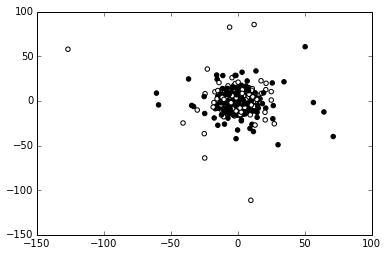

In [365]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
from sklearn.manifold import TSNE
pca = TSNE(n_components=4, verbose=1)
da = pca.fit_transform(X)
plotDataIn2D(da, Y)

In [128]:
# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

In [186]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
classifier = GaussianNB()

In [318]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

In [263]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
xs = pca.fit_transform(X)

In [321]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=4, verbose = 1)

In [347]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()

In [350]:
efrom sklearn.svm import SVC
classifier = SVC(verbose = 1) 

In [366]:
# split the data into training and validation sets
from sklearn.cross_validation import train_test_split
xs = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(xs,Y)
# X_train = X
# y_train = Y
# train the model
classifier.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = classifier.predict(X_test)
expected = y_test
matches = (predicted == expected)
print matches.sum()
print len(matches)

AttributeError: 'TSNE' object has no attribute 'transform'

In [354]:
matches = (predicted == expected)
print matches.sum()
print len(matches)

195
223


old 185
223

In [345]:
from sklearn import metrics
print metrics.classification_report(expected, predicted)
print metrics.confusion_matrix(expected, predicted)

             precision    recall  f1-score   support

          0       0.89      0.83      0.86       149
          1       0.69      0.80      0.74        74

avg / total       0.83      0.82      0.82       223

[[123  26]
 [ 15  59]]


In [349]:
# tem = pca.transform(Xt)
tem = Xt
resul = classifier.predict(tem)
print resul
writeFile(resul)

['0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '0' '0'
 '1' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0'
 '1' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '1' '0'
 '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0'
 '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0'
 '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1' '1' '0' '1' '1' '0'
 '1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1'
 '0' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '0' '0'
 '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '1